In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-paper-title-and-abstract-dataset/testB.csv
/kaggle/input/medical-paper-title-and-abstract-dataset/train.csv


1. Import All Libraries in NLP

In [52]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import keras 
import tensorflow
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from textblob import TextBlob

2. Data Inspection

In [3]:
medical = pd.read_csv('/kaggle/input/medical-paper-title-and-abstract-dataset/testB.csv')

In [4]:
medical.head(10)

,uuid,title,author,abstract
0,0,Tobacco Consumption and High-Sensitivity Cardi...,"Julia Brox Skranes,Magnus Nakrem Lyngbakken,Kr...",Background Cardiac troponins represent a sensi...
1,1,Approaching towards sustainable supply chain u...,"Mohammad Reza Seddigh,Sajjad Shokouhyar,Fateme...",These two main objectives of this study are to...
2,2,Does globalization matter for ecological footp...,"Kirikkaleli, Dervis; Adebayo, Tomiwa Sunday; K...",The main aim of this paper is to explore the r...
3,3,Myths and Misconceptions About University Stud...,"Megan Paull,Kirsten Holmes,Maryam Omari,Debbie...",This paper examines myths and misconceptions a...
4,4,Antioxidant Status of Rat Liver Mitochondria u...,"S I Khizrieva,R A Khalilov,A M Dzhafarova,V R ...",For evaluation of the contribution of the anti...
5,5,Business transformation in an age of turbulenc...,"Xishu Li,Maarten Voorneveld,René de Koster,Xis...",The COVID-19 pandemic has caused global econom...
6,6,Ameliorative effects of ribes rubrum oil again...,"Mohamed Farouk Elsadek,Alyah Almoajel,Mohammed...",The objective of this study was to assess the ...
7,7,Reconstruction and Exploratory Analysis of mTO...,"Richa Buddham,Sweety Chauhan,Priyanka Narad,Pu...",Mammalian target of rapamycin (mTOR) is a seri...
8,8,"Distribution, sources and human risk of perflu...","Dong, Huike; Lu, Guanghua; Yan, Zhenhua; Liu, ...","In recent years, perfluoroalkyl acids (PFAAs) ..."
9,9,Serum GDF-15 Predicts In-Hospital Mortality an...,"Qiuping Mo,Liuan Zhuo,Zhihong Liao,Rongshan Li...",This study aims to evaluate the association of...


In [5]:
medical.tail(10)

,uuid,title,author,abstract
1990,1990,Empirical analysis of climate change factors a...,"Chandio, Abbas Ali; Ozturk, Ilhan; Akram, Waqa...",This research has examined the dynamic linkage...
1991,1991,The operationalisation of sustainability: Sust...,"Osmundsen, Tonje C.; Amundsen, Vilde S.; Alexa...",Sustainability certification has become an inc...
1992,1992,Short Food Supply Chains (SFSC) as Local and S...,"Jarzebowski, Sebastian; Bourlakis, Michael; Be...",We distinguish different types of Short Food S...
1993,1993,"﻿New and poorly known ""araphid"" diatom species...","Eduardo A Morales,Carlos E Wetzel,Luc Ector,Ed...",Based on two Andean Altiplano samples and on l...
1994,1994,"Augmenting the effect of virtual labs with ""te...","Chen-Chung Liu,Cai-Ting Wen,Hsin-Yi Chang,Ming...",Virtual labs provide space for students to ite...
1995,1995,The treatment of veterinary antibiotics in swi...,"Qian, Mengcheng; Yang, Linyan; Chen, Xingkui; ...",Elevated concentrations and potential toxiciti...
1996,1996,Socio-political efficacy explains increase in ...,"Taciano L Milfont,Danny Osborne,Chris G Sibley...",The ongoing COVID-19 pandemic claimed millions...
1997,1997,Investigation of early puberty prevalence and ...,"Esin Gizem Olgun,Sirmen Kizilcan Cetin,Zeynep ...",We aimed to determine the prevalence of early ...
1998,1998,From 3D printing to 3D bioprinting: the materi...,"Nihal Engin Vrana,Sharda Gupta,Kunal Mitra,Alb...",The application of 3D printing technologies fi...
1999,1999,Effect of Processing on the Structure and Alle...,"Xuejiao Chang,Xiaoya Zhou,Yu Tang,Ying Zhang,J...",Peanut allergy is the leading pediatric food a...


In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uuid      2000 non-null   int64 
 1   title     2000 non-null   object
 2   author    2000 non-null   object
 3   abstract  2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


Data Cleaning

In [7]:
missing_values = medical.isnull().sum()

In [9]:
missing_values

uuid        0
title       0
author      0
abstract    0
dtype: int64

3. Summary Statistics

In [10]:
medical.describe()

,uuid
count,2000.000000
mean,999.500000
std,577.494589
min,0.000000
25%,499.750000
50%,999.500000
75%,1499.250000
max,1999.000000


In [11]:
medical.columns

Index(['uuid', 'title', 'author', 'abstract'], dtype='object')

In [12]:
count_medicalreview = medical['uuid'].count()
print("Medical Review Uuid:", count_medicalreview)

Medical Review Uuid: 2000


In [13]:
mean_medicalreview = medical['uuid'].mean()
print("Medical Review Uuid:", mean_medicalreview)

Medical Review Uuid: 999.5


In [14]:
std_medicalreview = medical['uuid'].std()
print("Medical Review Uuid:", std_medicalreview)

Medical Review Uuid: 577.4945887192364


In [15]:
min_medicalreview = medical['uuid'].min()
print("Medical Review Uuid:", min_medicalreview)

Medical Review Uuid: 0


In [16]:
max_medicalreview = medical['uuid'].max()
print("Medical Review Uuid:", max_medicalreview)

Medical Review Uuid: 1999


4. Data Visualization

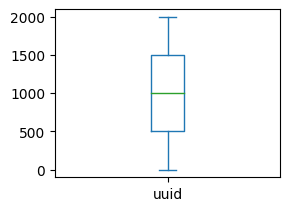

In [17]:
# box and whisker plots
medical.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

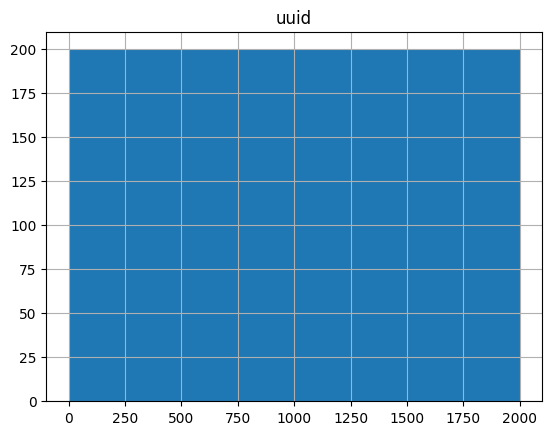

In [18]:
# histograms
medical.hist()
plt.show()

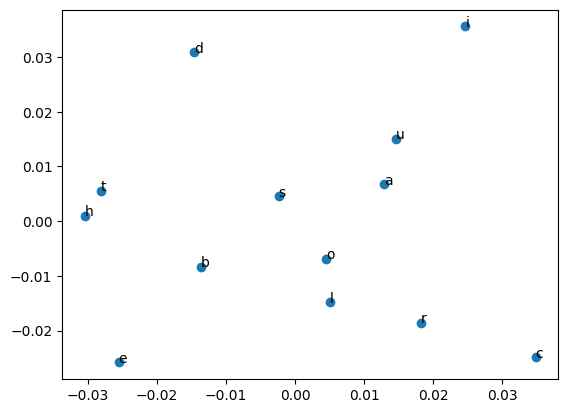

In [22]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Define training data
sentences = medical.head(10)


# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Correct way to access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Correct way to get vocabulary words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [23]:
medical.columns

Index(['uuid', 'title', 'author', 'abstract'], dtype='object')

In [25]:
# Tokenization and Lowercasing with NLTK
tokens = [word_tokenize(text.lower()) for text in medical['abstract']]

In [26]:
# TF-IDF Vectorization

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(medical['abstract'])

In [27]:
# Word2Vec Model
word2vec_model = Word2Vec(tokens, min_count=1)

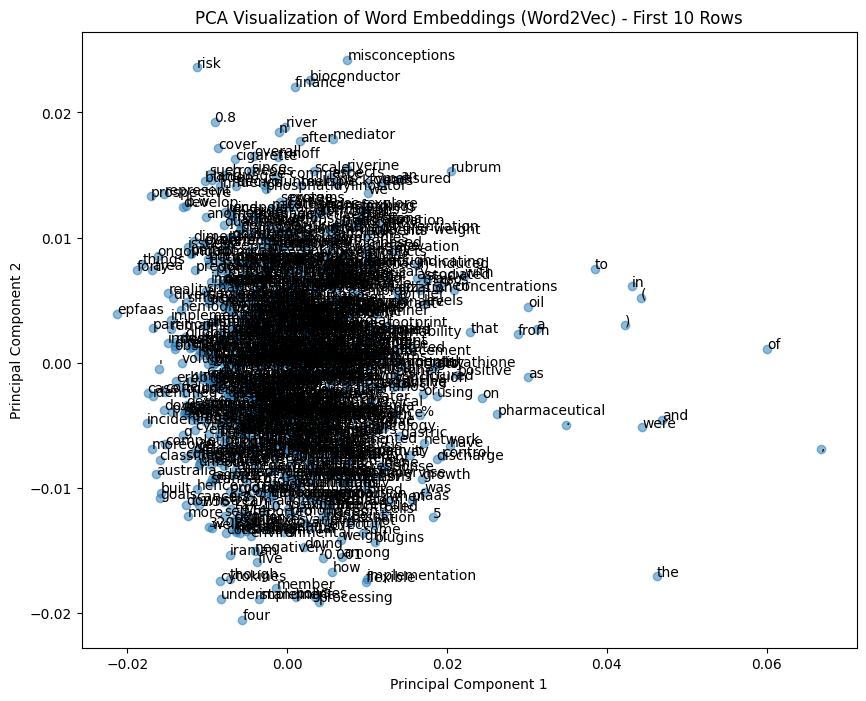

In [34]:
# Subset the first 10 rows of the data
subset_data = medical.head(10)

# Tokenization and Lowercasing with NLTK for the subset
subset_tokens = [word_tokenize(text.lower()) for text in subset_data['abstract']]

# Word2Vec Model for the subset
subset_word2vec_model = Word2Vec(subset_tokens, min_count=1)

# Visualizing Word Embeddings with PCA for the subset
X_word2vec_subset = subset_word2vec_model.wv[subset_word2vec_model.wv.key_to_index]
pca = PCA(n_components=2)
result_word2vec_subset = pca.fit_transform(X_word2vec_subset)

plt.figure(figsize=(10, 8))
plt.scatter(result_word2vec_subset[:, 0], result_word2vec_subset[:, 1], alpha=0.5)
subset_words = list(subset_word2vec_model.wv.index_to_key)
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(result_word2vec_subset[i, 0], result_word2vec_subset[i, 1]))
plt.title('PCA Visualization of Word Embeddings (Word2Vec) - First 10 Rows')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

5. Bag Of Words

In [35]:
nltk.download('punkt') 

text = "The main aim of this paper is to explore the role of globalization on ecological footprint in Turkey."
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['The', 'main', 'aim', 'of', 'this', 'paper', 'is', 'to', 'explore', 'the', 'role', 'of', 'globalization', 'on', 'ecological', 'footprint', 'in', 'Turkey', '.']


In [53]:
# Bag-of-Words Model For abstract

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(medical['abstract'])

# Displaying the feature names
vectorizer.get_feature_names_out()

array(['00', '000', '00008', ..., 'μmol', 'χ2', 'ωb97x'], dtype=object)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The COVID-19 pandemic has caused global economic turmoil. Although many companies have suffered huge...",
 "The covid 19",
 "The economic"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 13, 'covid': 4, '19': 0, 'pandemic': 11, 'has': 7, 'caused': 2, 'global': 6, 'economic': 5, 'turmoil': 14, 'although': 1, 'many': 10, 'companies': 3, 'have': 8, 'suffered': 12, 'huge': 9}
[1.28768207 1.69314718 1.69314718 1.69314718 1.28768207 1.28768207
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.         1.69314718]
(1, 15)
[[0.2102535  0.27645809 0.27645809 0.27645809 0.2102535  0.2102535
  0.27645809 0.27645809 0.27645809 0.27645809 0.27645809 0.27645809
  0.27645809 0.1632806  0.27645809]]


6. Bag-of-Words with Keras

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text documents
docs = [
    "The objective of this study was to assess the anti-inflammatory effects of ribes rubrum oil at three...",
    "Mammalian target of rapamycin (mTOR) is a serine-threonine kinase member of the cellular phosphatidy...",
    "In recent years, perfluoroalkyl acids (PFAAs) have become ubiquitously distributed in water environment...",
    "The UN Sustainable Development Goals have set clear targets on global poverty, hunger and malnutriti...",
    "Circular economy (CE) focuses on a circular approach to energy and material resources, which provide..",
    "Extracting osmotic energy through nanoporous membranes is an efficient way to harvest renewable and ...",
    "The aim of this study is to determine if there is an association between atrial arrhythmias and brain...",
    "A well-functioning chain of survival is critical for good outcomes following out-of-hospital cardiac..."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

# Examine what the tokenizer has learned
word_index = tokenizer.word_index
print(f"Word Index: {word_index}")

Word Index: {'<OOV>': 1, 'of': 2, 'the': 3, 'is': 4, 'to': 5, 'and': 6, 'a': 7, 'this': 8, 'study': 9, 'in': 10, 'have': 11, 'on': 12, 'circular': 13, 'energy': 14, 'an': 15, 'objective': 16, 'was': 17, 'assess': 18, 'anti': 19, 'inflammatory': 20, 'effects': 21, 'ribes': 22, 'rubrum': 23, 'oil': 24, 'at': 25, 'three': 26, 'mammalian': 27, 'target': 28, 'rapamycin': 29, 'mtor': 30, 'serine': 31, 'threonine': 32, 'kinase': 33, 'member': 34, 'cellular': 35, 'phosphatidy': 36, 'recent': 37, 'years': 38, 'perfluoroalkyl': 39, 'acids': 40, 'pfaas': 41, 'become': 42, 'ubiquitously': 43, 'distributed': 44, 'water': 45, 'environment': 46, 'un': 47, 'sustainable': 48, 'development': 49, 'goals': 50, 'set': 51, 'clear': 52, 'targets': 53, 'global': 54, 'poverty': 55, 'hunger': 56, 'malnutriti': 57, 'economy': 58, 'ce': 59, 'focuses': 60, 'approach': 61, 'material': 62, 'resources': 63, 'which': 64, 'provide': 65, 'extracting': 66, 'osmotic': 67, 'through': 68, 'nanoporous': 69, 'membranes': 70, 

7. Summarize Documents

In [40]:
import keras

# Define 5 documents
docs = [
    'students',
    'business',
    'experiment',
    'sources',
    'patients',
    'approached',
    'risks',
    'democracy',
    'energy',
    'technologies'
]

# Create the tokenizer
t = Tokenizer()  # Corrected by removing the incorrect argument

# Fit the tokenizer on the documents
t.fit_on_texts(docs)

# Summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# Integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('students', 1), ('business', 1), ('experiment', 1), ('sources', 1), ('patients', 1), ('approached', 1), ('risks', 1), ('democracy', 1), ('energy', 1), ('technologies', 1)])
10
{'students': 1, 'business': 2, 'experiment': 3, 'sources': 4, 'patients': 5, 'approached': 6, 'risks': 7, 'democracy': 8, 'energy': 9, 'technologies': 10}
defaultdict(<class 'int'>, {'students': 1, 'business': 1, 'experiment': 1, 'sources': 1, 'patients': 1, 'approached': 1, 'risks': 1, 'democracy': 1, 'energy': 1, 'technologies': 1})
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


8. Summarize Vocabulary

In [44]:
from gensim.models import Word2Vec

# Define training data
sentences = [
    ['Approaching', 'towards', 'sustainable supply', 'chain', 'under', 'the', 'spotlight', 'of', 'business intelligence'],
    ['Does', 'globalization', 'for', 'ecological', 'footprint', 'in', 'Turkey?', 'Evidence', 'from', 'dual', 'adjustment', 'approach'],
    ['Business', 'transformation', 'in', 'an', 'age', 'of', 'turbulence', '-', 'Lessons', 'learned', 'from', 'COVID-19'],
    ['Porous', 'Ti3C2Tx', 'MXene', 'Membranes', 'for', 'Highly', 'Efficient', 'Salinity', 'Gradient' 'Energy', 'Harvesting'],
    ['The', 'Impact', 'of', 'Population', 'Aging', 'and', 'Public Health', 'Support', 'on', 'EU', 'Labor Markets'],
    
    # Tokenized new sentence added
    ['An', 'Efficient', 'and', 'Convenient', 'Method', 'for' 'Isolation', 'and', 'Culturing', 'of' 'Neonatal Rat', 'Cardiomyocytes']
]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# Access vector for one word using the correct method
print(model.wv['Approaching'])

Word2Vec<vocab=56, vector_size=100, alpha=0.025>
['of', 'and', 'in', 'Efficient', 'from', 'for', 'Cardiomyocytes', 'age', 'an', 'transformation', 'Business', 'approach', 'adjustment', 'dual', 'Evidence', 'Turkey?', 'ecological', 'footprint', '-', 'globalization', 'Does', 'business intelligence', 'spotlight', 'the', 'under', 'chain', 'sustainable supply', 'towards', 'turbulence', 'Lessons', 'ofNeonatal Rat', 'learned', 'Culturing', 'forIsolation', 'Method', 'Convenient', 'An', 'Labor Markets', 'EU', 'on', 'Support', 'Public Health', 'Aging', 'Population', 'Impact', 'The', 'Harvesting', 'GradientEnergy', 'Salinity', 'Highly', 'Membranes', 'MXene', 'Ti3C2Tx', 'Porous', 'COVID-19', 'Approaching']
[-2.3880566e-03  7.5390972e-03  2.0417392e-03  2.8994619e-03
 -1.2428021e-03 -9.8939287e-03  1.3990104e-03  2.8858460e-03
 -9.8052109e-03 -3.9015389e-03 -2.3483122e-03 -5.0597144e-03
  3.9592646e-03  2.1051753e-03  4.3359841e-03 -6.4775874e-03
 -6.0028769e-03  4.7188415e-03  6.7790532e-03  5.52701

9. Text Classification

In [45]:
# Load CSV data
filename = '/kaggle/input/medical-paper-title-and-abstract-dataset/testB.csv'  
data = pd.read_csv(filename)

# Preprocess text (using NLTK for word tokenization)
data['tokenized_text'] = medical['abstract'].apply(word_tokenize)

# Create vocabulary and sequences
tokenizer = nltk.FreqDist()  # Simpler for demonstration 
for text in data['tokenized_text']:
    tokenizer.update(text)

word_index = {word: idx + 1 for idx, (word, _) in enumerate(tokenizer.most_common())}

def text_to_sequence(text, word_index):
    return [word_index.get(word, 0) for word in text]  # 0 for unknown words

sequences = data['tokenized_text'].apply(lambda x: text_to_sequence(x, word_index))

# Pad sequences
max_length = 100 
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['target'] = le.fit_transform(medical['abstract']) 

# Define problem
vocab_size = len(tokenizer.most_common()) + 1 
max_length = 100

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_shape=(max_length,)))  # Input shape added
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_sequences, data['target'], epochs=10, batch_size=32, validation_split=0.2) 

# Summarize the model
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -70.8478 - val_accuracy: 0.0025 - val_loss: -955.9925
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -3095.6990 - val_accuracy: 0.0025 - val_loss: -16948.5020
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -27899.9297 - val_accuracy: 0.0025 - val_loss: -71305.7031
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -94353.2891 - val_accuracy: 0.0025 - val_loss: -168061.8906
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -201359.0469 - val_accuracy: 0.0025 - val_loss: -305260.9688
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -359446.5938 - val_accuracy: 0.0025 - val_loss: -479814.0000
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: -525192.8125 - val_accuracy: 0.0025 - val_loss: -688808.3125
Epoch 8/10
50/50 ━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 8)         │       260,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,245 (2.99 MB)

 Trainable params: 261,081 (1019.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,164 (1.99 MB)

None


In [50]:
# Read the CSV file
filename = '/kaggle/input/medical-paper-title-and-abstract-dataset/testB.csv'
data = pd.read_csv(filename)

# If column names are different, please adjust accordingly
X = medical['abstract']
y = medical['abstract']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sentiment Analysis

In [55]:
# Calculating sentiment for each review

# Calculating sentiment polarity for each review
medical['Sentiment'] = medical['abstract'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the DataFrame with the sentiment column
print(medical)

      uuid                                              title  \
0        0  Tobacco Consumption and High-Sensitivity Cardi...   
1        1  Approaching towards sustainable supply chain u...   
2        2  Does globalization matter for ecological footp...   
3        3  Myths and Misconceptions About University Stud...   
4        4  Antioxidant Status of Rat Liver Mitochondria u...   
...    ...                                                ...   
1995  1995  The treatment of veterinary antibiotics in swi...   
1996  1996  Socio-political efficacy explains increase in ...   
1997  1997  Investigation of early puberty prevalence and ...   
1998  1998  From 3D printing to 3D bioprinting: the materi...   
1999  1999  Effect of Processing on the Structure and Alle...   

                                                 author  \
0     Julia Brox Skranes,Magnus Nakrem Lyngbakken,Kr...   
1     Mohammad Reza Seddigh,Sajjad Shokouhyar,Fateme...   
2     Kirikkaleli, Dervis; Adebayo, Tomiwa

* Sentiment Analysis results showed that 0.068577 to 0.078750 are positive sentiments . 

* If value -0.025893 is negative sentiments